In [13]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import qutip
import theano
import theano.tensor as T
import QubitNetwork
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### A Fredkin gate is be obtained with very good fidelity, $\simeq 99.999\%$, starting with all interactions on, and only $\sigma_z$ operators as self-interactions.

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


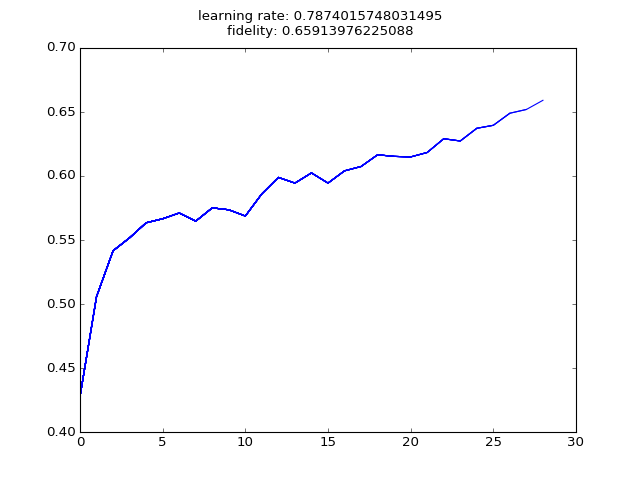

Finished training


In [96]:
net = QubitNetwork.QubitNetwork(
    num_qubits=4,
    interactions='all',
    self_interactions=('all', ['z']),
    system_qubits=[0, 1, 2]
#     J=new_Jvalues
)
net, funcs = QubitNetwork.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=200,
    batch_size=10,
    target_gate=qutip.fredkin(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
#     saveafter_file='nets/fredkin_best.pickle'
)

In [98]:
net = QubitNetwork.load_network_from_file('nets/fredkin_best.pickle')
gate = qutip.Qobj(net.get_current_gate(), dims=[[2, 2, 2, 2]] * 2)

fred = gate.ptrace([0, 1, 2]).data.toarray()
fred[np.abs(fred) < 1e-3] = 0.0
fred = fred * np.exp(-1j * np.angle(fred[0, 0]))
fred.imag[abs(fred.imag) <  1e-3] = 0.0

qutip.Qobj(fred)

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[ 1.99999127  0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          1.00001791  0.99999623  0.          0.          0.          0.
   0.        ]
 [ 0.          0.99999402  0.99996561  0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          1.99999111  0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          1.99999109  0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.99999012
   0.9999961   0.        ]
 [ 0.          0.          0.          0.          0.          0.99999413
   0.99999293  0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   1.99999134]]

In [102]:
net = QubitNetwork.load_network_from_file('nets/fredkin_best.pickle')
gate = qutip.Qobj(net.get_current_gate(), dims=[[2, 2, 2, 2]] * 2)

p00 = qutip.ket2dm(qutip.basis(2, 0))
p11 = qutip.ket2dm(qutip.basis(2, 1))
p01 = qutip.Qobj([[0, 1], [0, 0]])
p10 = qutip.Qobj([[0, 0], [1, 0]])

i3 = qutip.tensor([qutip.qeye(2) for _ in range(3)])
ntlp = utils.normalize_topleft_phase

extracted1 = (qutip.tensor(i3, p00) * gate * qutip.tensor(i3, p00)).ptrace([0, 1, 2])
extracted2 = (qutip.tensor(i3, p11) * gate * qutip.tensor(i3, p11)).ptrace([0, 1, 2])
extracted3 = (qutip.tensor(i3, p01) * gate * qutip.tensor(i3, p01)).ptrace([0, 1, 2])
extracted4 = (qutip.tensor(i3, p10) * gate * qutip.tensor(i3, p10)).ptrace([0, 1, 2])

display(chop(ntlp(chop(extracted1))))
display(ntlp(chop(extracted2)))
display(ntlp(chop(extracted3)))
display(ntlp(chop(extracted4)))

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[ 0.38262553  0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.38271334  0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.38271012  0.          0.          0.          0.
   0.        ]
 [ 0.00113171  0.          0.          0.38268825  0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.38260567  0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.38270471  0.        ]
 [ 0.          0.          0.          0.          0.          0.38273547
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.38260234]]

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[ 0.38230036+0.j          0.00000000+0.j          0.00000000+0.j
   0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
   0.00000000+0.j          0.00000000+0.j        ]
 [ 0.00000000+0.j          0.00000000+0.j          0.38269167+0.j
   0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
   0.00000000+0.j          0.00000000+0.j        ]
 [ 0.00000000+0.j          0.38272269+0.j          0.00000000+0.j
   0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
   0.00000000+0.j          0.00000000+0.j        ]
 [ 0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
   0.38240083+0.j          0.00000000+0.j          0.00000000+0.j
   0.00000000+0.j          0.00000000+0.j        ]
 [ 0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
   0.00000000+0.j          0.38262003+0.j          0.00000000+0.j
   0.00000000+0.j          0.0000

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]

In [111]:
1 / np.sqrt(np.arange(10))

array([        inf,  1.        ,  0.70710678,  0.57735027,  0.5       ,
        0.4472136 ,  0.40824829,  0.37796447,  0.35355339,  0.33333333])